In [ ]:
!git clone https://github.com/lapudas/GreenAI.git

Cloning into 'GreenAI'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 29 (delta 8), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 44.45 KiB | 734.00 KiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
%pip install --user --upgrade --force-reinstall codecarbon

  Using cached codecarbon-3.0.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached fief_client-0.20.0-py3-none-any.whl.metadata (2.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.6 MB/s eta 0:00:00
  Using cached psutil-7.0.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 6.5 MB/s eta 0:00:00
  Using cached questionary-2.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached rapidfuzz-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached types_python_dateutil-2.9.0.20250708-py3-none-any.whl.metadata (1.9 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached jwcrypto-1.5.6-py3-none-any.whl.metadata (3.1 kB)
  Using cached yaspin-3.1.0-py3-none-any.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
%pip install codecarbon
%pip install evaluate
%pip install rouge_score

# curl -fsSL https://ollama.com/install.sh | sh
# ollama serve & ollama pull llama3
# ollama run llama3:8b

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.1/610.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take int

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=dfbc26acc58152e557d59cf6ecb6c2babdfe7c6f7f6779e85d8bf867f638f25c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [1]:
from codecarbon import EmissionsTracker
from codecarbon import track_emissions
# Load the ROUGE metric
import evaluate
from evaluate import load
import pandas as pd

In [ ]:
!ollama list

NAME         ID              SIZE      MODIFIED      
llama3:8b    365c0bd3c000    4.7 GB    9 minutes ago    


In [ ]:
# read files(src)
# 1 document 一行，||||| 分段落
'''f = open("/content/train.src.txt","r")
train_data = f.readlines()
f.close()'''

f = open("/content/test.src.txt","r")
test_data = f.readlines()
f.close()

'''f = open("/content/val.src.txt","r")
val_data = f.readlines()
f.close()'''

print(f"test: {len(test_data)}")#(f"train: {len(train_data)}\ntest: {len(test_data)}\nval: {len(val_data)}")

test: 2732


In [ ]:
f = open("/content/test.txt","r")
test_result = f.readlines()
f.close()

print(test_result[0])
print(len(test_result))

– It's a race for the governor's mansion in 11 states today, and the GOP could end the night at the helm of more than two-thirds of the 50 states. The GOP currently controls 29 of the country's top state offices; it's expected to keep the three Republican ones that are up for grabs (Utah, North Dakota, and Indiana), and wrest North Carolina from the Dems. That brings its toll to 30, with the potential to take three more, reports NPR. Races in Montana, New Hampshire, and Washington are still too close to call, and in all three, Democrat incumbents aren't seeking reelection. The results could have a big impact on health care, since a Supreme Court ruling grants states the ability to opt out of ObamaCare's Medicaid expansion. "A Romney victory would dramatically empower Republican governors," said one analyst. Click for NPR's state-by-state breakdown of what could happen.

5622


In [3]:
import re
from collections import Counter, defaultdict
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt_tab')
# Download needed NLTK models
nltk.download("punkt")

def extract_key_sentences(document, top_k_entities=5):
    # 1. Split by articles
    article_texts = document.split("|||||")

    # 2. Tokenize sentences
    all_sents = []
    for article in article_texts:
        all_sents += sent_tokenize(article)

    # 3. Naive NER (Proper Nouns in Title Case)
    entity_counter = Counter()
    sent_to_entities = defaultdict(set)

    for sent in all_sents:
        words = word_tokenize(sent)
        for i, word in enumerate(words):
            if word[0].isupper() and word.isalpha():
                entity_counter[word] += 1
                sent_to_entities[sent].add(word)

    # 4. Get top-k frequent entities
    top_entities = {e for e, _ in entity_counter.most_common(top_k_entities)}

    # 5. Score sentences by overlap with top entities
    scored_sents = []
    for sent in all_sents:
        overlap = len(sent_to_entities[sent] & top_entities)
        if overlap > 0:
            scored_sents.append((overlap, sent))

    # 6. Sort by score descending
    scored_sents.sort(reverse=True)

    # 7. Return top-ranked sentences
    ranked_sents = [s for _, s in scored_sents]
    return ranked_sents[:10]  # Return top 10 for summarization

# Example usage
test_doc = """
Wildfires have burned across tens of thousands of acres of parched terrain in Colorado, spurring thousands of evacuations. |||||
Authorities have shuttered the San Juan National Forest in southwestern Colorado, and residents were forced to evacuate. |||||
The Buffalo Fire west of Denver is also prompting evacuations, as dry conditions persist across the state.
"""

sentences = extract_key_sentences(test_doc, top_k_entities=5)
for i, s in enumerate(sentences, 1):
    print(f"{i}. {s}")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1. 
Authorities have shuttered the San Juan National Forest in southwestern Colorado, and residents were forced to evacuate.
2. 
Wildfires have burned across tens of thousands of acres of parched terrain in Colorado, spurring thousands of evacuations.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
%pip install transformers datasets accelerate --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00


In [2]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [3]:
from datasets import Dataset
import pandas as pd

# Load the aligned document–summary pairs
def load_txt_pair(document_path, summary_path):
    with open(document_path, "r", encoding="utf-8") as f_doc, open(summary_path, "r", encoding="utf-8") as f_sum:
        documents = [line.strip() for line in f_doc]
        summaries = [line.strip() for line in f_sum]

    assert len(documents) == len(summaries), "Mismatch in number of documents and summaries"

    data = {"document": documents, "summary": summaries}
    df = pd.DataFrame(data)
    return Dataset.from_pandas(df)

# Example: Load training and validation sets
train_dataset = load_txt_pair("/content/train.src.txt", "/content/train.txt")
val_dataset = load_txt_pair("/content/val.src.txt", "/content/val.txt")

# Combine into Hugging Face DatasetDict
from datasets import DatasetDict
dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset
})

dataset


DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "google/flan-t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
max_input_length = 1024
max_target_length = 256

def preprocess(example):
    inputs = tokenizer(
        example["document"],
        max_length=max_input_length,
        truncation=True,
        padding="max_length",
    )
    targets = tokenizer(
        example["summary"],
        max_length=max_target_length,
        truncation=True,
        padding="max_length"
    )
    inputs["labels"] = targets["input_ids"]
    return inputs

tokenized_dataset = dataset.map(preprocess, batched=True, remove_columns=["document", "summary"])


Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

In [6]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
)


/tmp/ipython-input-6-2084207950.py:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()
sample = dataset["validation"][0]
input_ids = tokenizer(sample["document"], return_tensors="pt", truncation=True, max_length=1024).input_ids
output = model.generate(input_ids, max_new_tokens=200)
print("Model summary:", tokenizer.decode(output[0], skip_special_tokens=True))
print("Reference summary:", sample["summary"])


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: lulutinganyu (lulutinganyu-github) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


In [ ]:
import evaluate
import numpy as np

from datasets import Dataset
import pandas as pd

def load_test_pair(src_path, tgt_path):
    with open(src_path, "r", encoding="utf-8") as f1, open(tgt_path, "r", encoding="utf-8") as f2:
        docs = [line.strip() for line in f1]
        summaries = [line.strip() for line in f2]
    assert len(docs) == len(summaries), "Mismatch in lengths!"
    df = pd.DataFrame({"document": docs, "summary": summaries})
    return Dataset.from_pandas(df)

test_dataset = load_test_pair("test.src.txt", "test.txt")


rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
predictions = []
references = []

for example in test_dataset:
    input_text = example["document"]
    target_text = example["summary"]

    input_ids = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).input_ids.to(model.device)
    output_ids = model.generate(input_ids, max_new_tokens=128)
    pred_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    predictions.append(pred_text)
    references.append(target_text)

# ROUGE expects a list of predictions and references
rouge_scores = rouge.compute(predictions=predictions, references=references)
print("ROUGE scores:")
for k, v in rouge_scores.items():
    print(f"{k}: {v:.4f}")

# BLEU expects list of tokenized hypotheses and references
bleu_score = bleu.compute(
    predictions=[p.split() for p in predictions],
    references=[[r.split()] for r in references]
)
print("\nBLEU score:")
print(f"BLEU: {bleu_score['bleu']:.4f}")

import matplotlib.pyplot as plt

x = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleu']
y = [rouge_scores[r] for r in x[:4]] + [bleu_score['bleu']]
plt.bar(x,y)
plt.title("google/flan-t5-small")
plt.show()


In [ ]:
# from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
# from peft import get_peft_model, LoraConfig, TaskType
# from datasets import load_dataset

# # 1. Load model and tokenizer
# model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B")
# tokenizer = AutoTokenizer.from_pretrained("TinyLlama/TinyLlama-1.1B")

# # 2. Apply LoRA
# peft_config = LoraConfig(task_type=TaskType.CAUSAL_LM, r=8, lora_alpha=16, lora_dropout=0.05)
# model = get_peft_model(model, peft_config)

# # 3. Load your dataset (Multi-News style)
# dataset = load_dataset("path/to/your/data")  # CSV or JSONL with "document" and "summary"

# # 4. Tokenize and format
# def preprocess(example):
#     prompt = f"Summarize the following articles:\n\n{example['document']}\n\nSummary:"
#     target = example['summary']
#     inputs = tokenizer(prompt, truncation=True, padding="max_length", max_length=1024)
#     labels = tokenizer(target, truncation=True, padding="max_length", max_length=256)
#     inputs["labels"] = labels["input_ids"]
#     return inputs

# tokenized_data = dataset.map(preprocess)

# # 5. Train
# trainer = Trainer(
#     model=model,
#     args=TrainingArguments(
#         output_dir="./results",
#         per_device_train_batch_size=2,
#         num_train_epochs=3,
#         logging_steps=10,
#         save_steps=100,
#         fp16=True,
#     ),
#     train_dataset=tokenized_data["train"],
#     eval_dataset=tokenized_data["validation"],
# )

# trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: TinyLlama/TinyLlama-1.1B is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
import requests
import re

def preprocess(text):
  # Replace placeholder newline tokens
  text = text.replace("NEWLINE_CHAR", "\n")
  # Remove duplicate credits or captions
  text = re.sub(r"(jim cole\s*/\s*ap\s*)+", "", text, flags=re.IGNORECASE)
  # Normalize whitespace and lowercase
  text = re.sub(r"\s+", " ", text).strip().lower()
  return text

def chat_with_ollama(document, model="llama3:8b"):
  url = "http://localhost:11434/api/chat"
  headers = {"Content-Type": "application/json"}
  system_prompt = {
    "role": "system",
    "content": (
      "Summarize the following article into 2–3 clear and concise sentences. "
      "Output only the summary. Do not include any explanation or headings."
    )
  }

  document_parts = document.split("|||||")
  summaries = []

  for part in document_parts:
    part = preprocess(part)
    if not part.strip():
      continue
    data = {
      "model": model,
      "messages": [system_prompt, {"role": "user", "content": part}],
      "stream": False
    }
    response = requests.post(url, headers=headers, json=data)
    result = response.json()
    summaries.append(result["message"]["content"])

  # Combine summaries
  combine_prompt = {
    "role": "system",
    "content": "Combine the following summaries into a single concise summary. Output only the summary itself."
  }
  combined_input = "\n".join(summaries)
  data = {
    "model": model,
    "messages": [combine_prompt, {"role": "user", "content": combined_input}],
    "stream": False
  }
  response = requests.post(url, headers=headers, json=data)
  result = response.json()
  return result["message"]["content"]

# print(test_data[0])
# print(chat_with_ollama(test_data[0]))

In [ ]:
#不需要了
# import os

# cpu_power_path = "/usr/local/lib/python3.11/dist-packages/codecarbon/data/hardware/cpu_power.csv"
# os.makedirs(os.path.dirname(cpu_power_path), exist_ok=True)

# with open(cpu_power_path, "w") as f:
#     f.write("Name,TDP,TDP_min,TDP_max,sockets\n")
#     f.write("intel xeon 2.00ghz,85,80,95,1\n")  # placeholder values


In [ ]:
candidates = []
data_num = 1000

@track_emissions()
def summarize():
    for document in test_data[:data_num]:
        candidates.append(chat_with_ollama(document))

summarize()

串流輸出內容已截斷至最後 5000 行。
[codecarbon INFO @ 23:36:32] 0.338402 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:36:47] Energy consumed for RAM : 0.064493 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 23:36:47] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 23:36:47] Energy consumed for All CPU : 0.274127 kWh
[codecarbon INFO @ 23:36:47] 0.338620 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:37:02] Energy consumed for RAM : 0.064535 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 23:37:02] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 23:37:02] Energy consumed for All CPU : 0.274304 kWh
[codecarbon INFO @ 23:37:02] 0.338839 kWh of electricity used since the beginning.
[codecarbon INFO @ 23:37:17] Energy consumed for RAM : 0.064577 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 23:37:17] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbo

In [ ]:
references = [i.strip("– ") for i in test_result[:data_num]]
print(references[0])

NameError: name 'data_num' is not defined

In [ ]:
# rouge
rouge = evaluate.load('rouge')
results_R = rouge.compute(predictions=candidates, references=references) #結果平均

print("ROUGE:")
print(f"rouge1: {results_R['rouge1']}\nrouge2: {results_R['rouge2']}\nrougeL: {results_R['rougeL']}\nrougeLsum: {results_R['rougeLsum']}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ROUGE:
rouge1: 0.20320832948628315
rouge2: 0.058429390564267394
rougeL: 0.1312984108881206
rougeLsum: 0.1313819812545387


In [ ]:
# bleu
# 不需要 brevity_prnalty，可能要考慮手動算 bleu(無BP)
bleu = evaluate.load('bleu')
results_B = bleu.compute(predictions=candidates, references=references)
print("BLEU:")
print(f"bleu: {results_B['bleu']}\nprecisions: {results_B['precisions']}\nbrevity_penalty: {results_B['brevity_penalty']}\nlength_ratio: {results_B['length_ratio']}\ntranslation_length: {results_B['translation_length']}\nreference_length: {results_B['reference_length']}")

BLEU:
bleu: 0.0023562428637233196
precisions: [0.539622641509434, 0.13846153846153847, 0.047058823529411764, 0.024]
brevity_penalty: 0.024583977303950146
length_ratio: 0.21251002405773858
translation_length: 265
reference_length: 1247


In [ ]:
'''results_R = {}
results_R['rouge1'] = 0.3042215287471872
results_R['rouge2'] = 0.08818775179799443
results_R['rougeL'] =  0.1639229255348068
results_R['rougeLsum'] = 0.16663142006267556

results_B = {}
results_B['bleu'] = 0.02515597115661552

print(results_R)'''

"results_R = {}\nresults_R['rouge1'] = 0.3042215287471872\nresults_R['rouge2'] = 0.08818775179799443\nresults_R['rougeL'] =  0.1639229255348068\nresults_R['rougeLsum'] = 0.16663142006267556\n\nresults_B = {}\nresults_B['bleu'] = 0.02515597115661552\n\nprint(results_R)"

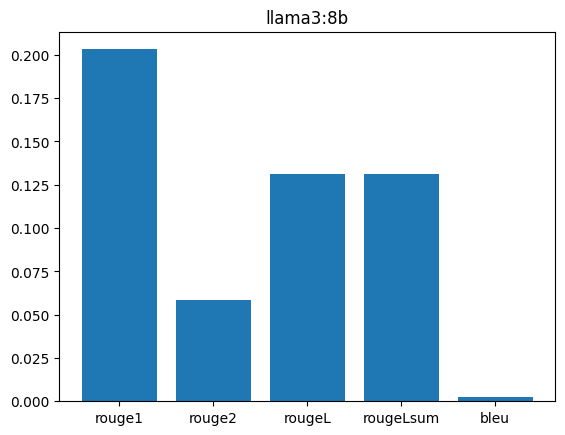

In [ ]:
import matplotlib.pyplot as plt

x = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleu']
y = [results_R[r] for r in x[:4]] + [results_B['bleu']]
plt.bar(x,y)
plt.title("llama3:8b")
plt.show()